### Tidy-up metadata, modify Braun Age, and save adata as new file (`Output_231215_adata_scvi_random_sampleID.h5ad`)

In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

sc.settings.n_jobs = 30
sc.set_figure_params(figsize=(4,4), vector_friendly = True)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [2]:
adata2 = sc.read_h5ad("/data2/scData/Brain_Allen_v2.2/Data/Output_240213_adata_scvi_random_sampleID_all_JL.h5ad") # 10m

In [3]:
adata2

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0', 'leiden_0.6', 'leiden_0.8', 'leiden_0.9', 'cluster_annotated'
    uns: 'cluster_annotated_colors', 'log1p', 'ttest_pts', 'wilcoxon'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts', 'scaled'

In [5]:
adata = sc.read_h5ad("Data/Output_231215_adata_scvi_random_sampleID.h5ad")

In [7]:
adata

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'DF_classification', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'X_scvi_batch', 'X_scvi_labels', 'leiden_scvi', 'Leiden'
    uns: 'Brain_Region3_colors', 'Brain_Region_colors', 'Leiden_colors', 'Stage2_colors', 'Stage_colors', 'cluster_main2_colors', 'cluster_main_colors', 'leiden_scvi_colors', 'log1p'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts', 'scaled'

In [8]:
adata2.uns["Brain_Region_colors"] = adata.uns["Brain_Region_colors"]

In [10]:
adata2.obs["Brain_Region"] = adata.obs["Brain_Region"]

In [12]:
adata2.obs["Age"] = adata.obs["Age"]

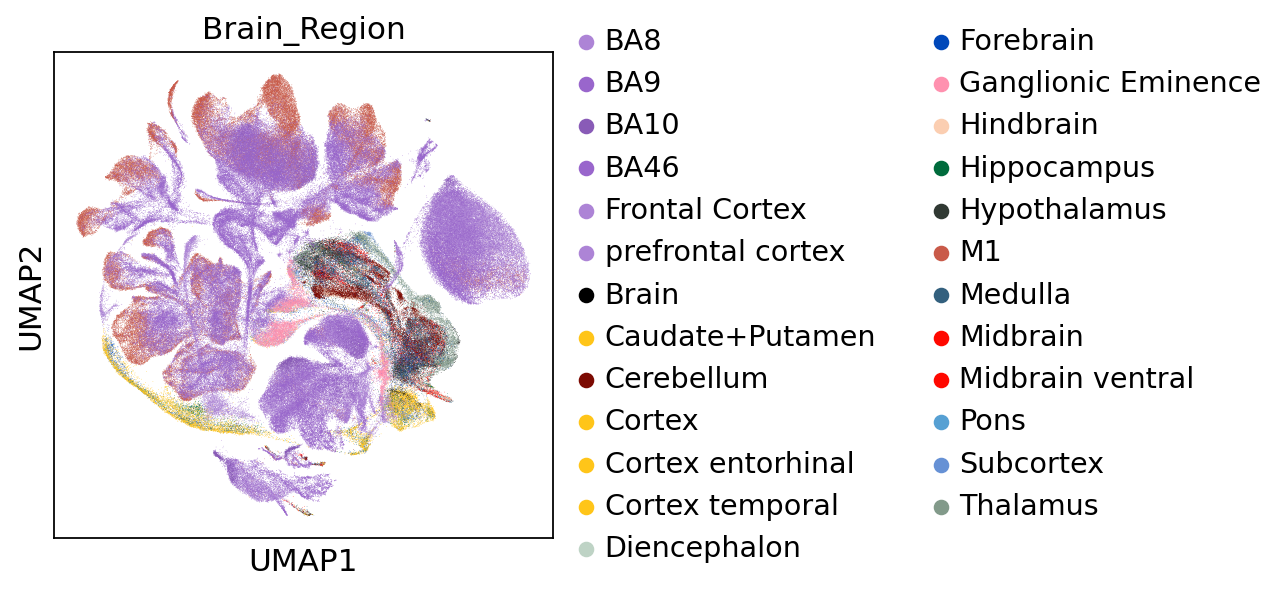

In [11]:
sc.pl.umap(adata2, color = "Brain_Region")

In [4]:
adata2.obs.columns

Index(['batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI',
       'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis',
       'DF_classification', 'cluster_original', 'cluster_main', 'n_genes',
       'Stage2', 'n_genes_by_counts', 'total_counts', 'total_counts_mt',
       'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch',
       '_scvi_labels', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0',
       'leiden_0.6', 'leiden_0.8', 'leiden_0.9', 'cluster_annotated'],
      dtype='object')

In [13]:
adata2.obs["DF_classification"].value_counts()

nan    393060
Name: DF_classification, dtype: int64

In [13]:
adata2.obs = adata2.obs.drop(columns=['DF_classification', 'leiden_scvi', 'leiden_0.5', 'leiden_0.7', 'leiden_1.0', 'leiden_0.8', 'leiden_0.9'])

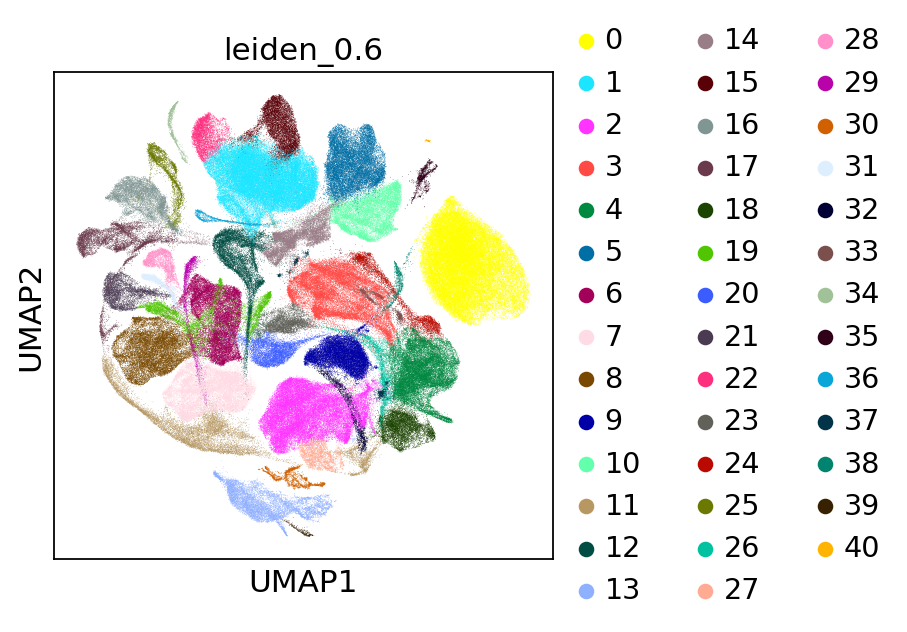

In [14]:
sc.pl.umap(adata2, color = "leiden_0.6")

In [23]:
adata2.obs["Leiden"] = "C" + adata2.obs["leiden_0.6"].astype(str)

In [16]:
adata2.obs["Stage"] = adata2.obs["Stage2"]

In [7]:
# adata.obs["PMI"] = adata.obs["PMI"].astype(str)
# adata.obs["predicted_doublets"] = adata.obs["predicted_doublets"].astype(str)

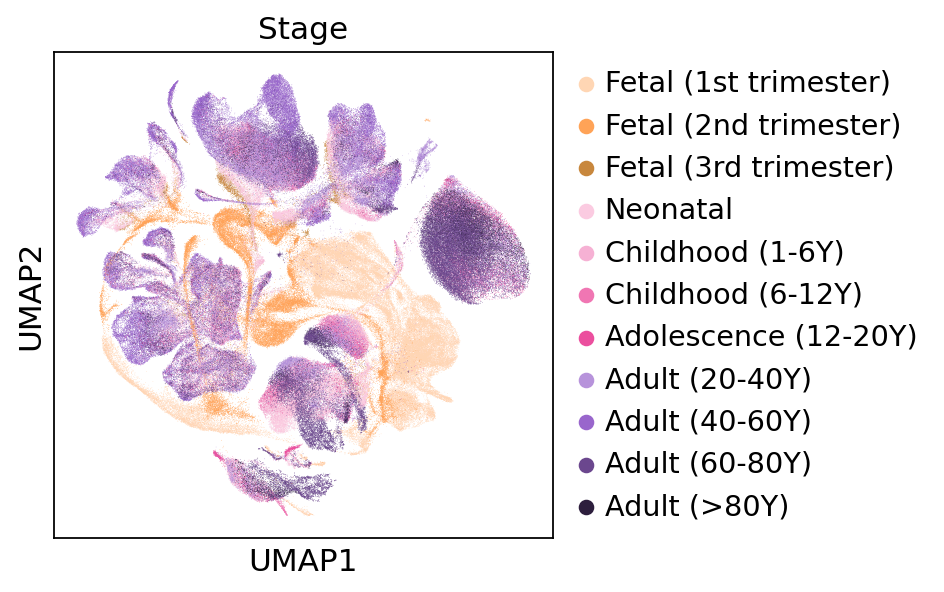

In [17]:
sc.set_figure_params(vector_friendly=True)
col_dict_stage = {'Fetal (1st trimester)': '#ffd6b4',
            'Fetal (2nd trimester)': '#ffa357',
            'Fetal (3rd trimester)': '#c8873d',
            'Neonatal': '#fbcbe1',
            'Childhood (1-6Y)': '#f6b1d4',
            'Childhood (6-12Y)': '#f076b3',
            'Adolescence (12-20Y)': '#eb4f9e',
            'Adult (20-40Y)': '#b793db',
            'Adult (40-60Y)': '#9966cc',
            'Adult (60-80Y)': '#6b478e',
            'Adult (>80Y)': '#2d1e3d'}

adata2.obs['Stage'] = pd.Categorical(adata2.obs['Stage'], categories=col_dict_stage.keys(), ordered=True)

sc.pl.umap(adata2, color='Stage', palette=col_dict_stage)

In [18]:
adata2.obs = adata2.obs.drop(columns = "Stage2")

In [19]:
adata2.obs.columns

Index(['batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI',
       'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis',
       'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores',
       'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_0.6',
       'cluster_annotated', 'Leiden'],
      dtype='object')

In [20]:
adata2

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_0.6', 'cluster_annotated', 'Leiden'
    uns: 'cluster_annotated_colors', 'log1p', 'ttest_pts', 'wilcoxon', 'Brain_Region_colors', 'leiden_0.6_colors', 'Stage_colors'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'counts', 'logcounts', 'scaled'

In [27]:
del adata2.X
del adata2.layers["counts"]

In [28]:
adata2

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_0.6', 'cluster_annotated', 'Leiden'
    uns: 'cluster_annotated_colors', 'log1p', 'ttest_pts', 'wilcoxon', 'Brain_Region_colors', 'leiden_0.6_colors', 'Stage_colors'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'logcounts', 'scaled'

In [29]:
adata2.write_h5ad("Data/Output_240215_adata_scvi_random_sampleID.h5ad") # 10m

In [2]:
adata = sc.read_h5ad("Data/Output_240216_adata_scvi_random_sampleID.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 393060 × 49133
    obs: 'batch', 'sampleID', 'Age', 'Assay', 'Stage', 'Race', 'PMI', 'Hemisphere', 'Library', 'Brain_Region', 'Dataset', 'Sex', 'Diagnosis', 'cluster_original', 'cluster_main', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', '_scvi_batch', '_scvi_labels', 'leiden_0.6', 'cluster_annotated', 'Leiden', 'Cell Type'
    uns: 'Brain_Region_colors', 'Cell Type_colors', 'Stage_colors', 'cluster_annotated_colors', 'leiden_0.6_colors', 'log1p', 'ttest_pts', 'wilcoxon'
    obsm: 'X_scVI_sampleID', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'logcounts', 'scaled'